In [15]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchsampler import ImbalancedDatasetSampler
import matplotlib.pyplot as plt
import os
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from functools import reduce
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [16]:
import loaders as l
import models as m
import train_eval as te

In [17]:
train_dir = 'C:/Users/33783/Desktop/start_deep/start_deep/train_images'
test_dir = 'C:/Users/33783/Desktop/start_deep/start_deep/test_images'

transform = transforms.Compose(
    [transforms.Grayscale(), 
     transforms.ToTensor(), 
     transforms.Normalize(mean=(0,),std=(1,))])

valid_size = 0.2
batch_size = 32

train_loader,valid_loader,test_loader=l.make_all_loaders(train_dir,test_dir,transform,valid_size,batch_size)
classes = ('noface','face')


BaseNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[ 1, 2000] loss: 0.157 f1_score on validation set : 0.946
[ 2, 2000] loss: 0.035 f1_score on validation set : 0.968
[ 3, 2000] loss: 0.021 f1_score on validation set : 0.976
[ 4, 2000] loss: 0.017 f1_score on validation set : 0.981
[ 5, 2000] loss: 0.012 f1_score on validation set : 0.984
[ 6, 2000] loss: 0.010 f1_score on validation set : 0.986
[ 7, 2000] loss: 0.009 f1_score on validation set : 0.988
[ 8, 2000] loss: 0.007 f1_score on validation set : 0.989
[ 9, 2000] loss: 0.007 f1_score on validation set : 0.990
[10, 2000] loss: 0.005 f1_score on validation set : 0.991
[11, 2000] loss: 0.005 f1_score on validation set : 0.991
[12, 2000] loss: 0.005 f1_score on validation set

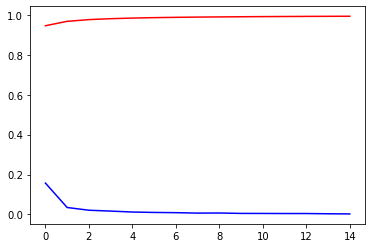

In [27]:
net = m.BaseNet()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
#l'original mais moins bonne #optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

epochs=15

#Training

all_labels,all_predicted,all_losses,all_accuracies,all_f1scores= te.train_v1(net,criterion,optimizer,epochs,train_loader,valid_loader)
            
plt.plot(all_losses, color='blue')
plt.plot(all_f1scores, color='red')

In [33]:
saved_model_path='C:/Users/33783/Desktop/start_deep/start_deep/firstModel'
torch.save(net.state_dict(), saved_model_path )

In [34]:
net = m.BaseNet()
net.load_state_dict(torch.load(saved_model_path))

<All keys matched successfully>

In [35]:
te.calc_metrics_v1(net,test_loader,all_labels,all_predicted,show=True) 

Validation set
f1_score 0.9923643485095572
precision 0.9922769585828031
recall 0.9924517776423092
confusion matrix
 [[9.92959763e-01 6.97613129e-03 3.98880286e-05 2.42177317e-05]
 [7.53236609e-03 9.92409559e-01 3.33932961e-05 2.46820014e-05]
 [9.09090909e-02 9.09090909e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


(0.9923643485095572,
 0.9922769585828031,
 0.9924517776423092,
 array([[9.92959763e-01, 6.97613129e-03, 3.98880286e-05, 2.42177317e-05],
        [7.53236609e-03, 9.92409559e-01, 3.33932961e-05, 2.46820014e-05],
        [9.09090909e-02, 9.09090909e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

In [36]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 93 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))